In [1]:
from scipy import linalg as la
from scipy import optimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'

# sympy está dando um aviso de código depreciado. Para fins de aprendizagem, estas linhas abaixo omitem os erros.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
sp.init_printing()

NameError: name 'matplotlib' is not defined

In [ ]:
A = sp.Matrix([[2, 3], [5, 4]])
b = sp.Matrix([4, 3]) # Does the book not use it here?

In [ ]:
A.rank()

In [ ]:
A.condition_number()
# The condition number is how much the output of a function F: A->B changes for small changes in the input value

In [ ]:
sp.N(_)
# "_" is the last output. sp.N(exp) calculates the numerical value of an expression exp

In [ ]:
A.norm()

In [ ]:
# The same cam be performed with numpy arrays and scipy:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
np.linalg.matrix_rank(A)

In [ ]:
np.linalg.cond(A)

In [ ]:
np.linalg.norm(A)

### LowerUpper (LU) Decomposition/Factorization of a Matrix

A = LU, where L is the lower triangle matrix and U is the upper one.
If we want to solve Ax=b, we can use LU decomposition, which is computationally efficient:

    A = LU
    Ly = b
    Ux = y

In [ ]:
A = sp.Matrix([[2, 3], [5, 4]])
b = sp.Matrix([4, 3])
L, U, _ = A.LUdecomposition()

In [ ]:
L

In [ ]:
U

In [ ]:
L * U

In [ ]:
A

In [ ]:
x = A.solve(b)

In [ ]:
x

In [ ]:
x = A.LUsolve(b)

In [ ]:
x

Permutation matrix, P:

A = PLU

In [ ]:
A = np.array([[2,3], [5,4]])
b = np.array([4, 3])
P, L, U = la.lu(A)

In [ ]:
P

In [ ]:
L

In [ ]:
U

In [ ]:
P.dot(L.dot(U))

In [ ]:
# depending on the values, it could or not be solved symbolically.

In [ ]:
p = sp.symbols("p", positive=True)
A = sp.Matrix([[1, sp.sqrt(p)], [1, 1/sp.sqrt(p)]])
b = sp.Matrix([1, 2])

In [ ]:
A

In [ ]:
x = A.solve(b)

In [ ]:
x

Graphing the error for values near 1:

In [ ]:
p = sp.symbols("p", positive=True)
A = sp.Matrix([[1, sp.sqrt(p)],[1, 1/sp.sqrt(p)]])
b = sp.Matrix([1, 2])

In [ ]:
# Solving symbolically
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

In [ ]:
Acond

In [ ]:
# Numberical problem specification
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

In [ ]:
# Graphing both symbolic (exact) and numerical results

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
p_vec = np.linspace(0.9, 1.1, 200)

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym) / x_sym, "tab:blue", lw=1)
                 
axes[0].set_title("Error in solution\n(Numerical - Symbolic) / Symbolic")
axes[0].set_xlabel(r"$r$", fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition Number")
axes[1].set_xlabel(r"$p$", fontsize=18)


### Retangular Systems

In [ ]:
x_vars = sp.symbols("x_1 x_2 x_3")
A = sp.Matrix([[1, 2, 3], [4, 5, 6]])
x = sp.Matrix(x_vars)
b = sp.Matrix([7, 8])

In [ ]:
A*x

In [ ]:
x

In [ ]:
A*x

In [ ]:
sp.solve(A*x - b, x_vars)

### Retangular systems and least square approximations

In [ ]:
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x ** 2 # A non linear equation for x

# Noise data - adding random values to the exact value
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X ** 2 + np.random.randn(m)

# fitting the simulated data to the model, using the linear least square
A = np.vstack([X ** 0, X ** 1, X ** 2]) # see np.vander?
sol, r, rank, sv = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1] * x + sol[2] * x ** 2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, "go", alpha=0.5, label="Simulated data")
ax.plot(x, y_exact, "k", lw=2, label="True value $y = 1 + 2x + 3x^2$")
ax.plot(x, y_fit, "b", lw=2, label="Least square fit")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

Overfitting can happen if the approximation fits not only the underlying model but also the noise in the data

In [ ]:
# 1st order polynomial
A = np.vstack([X ** n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x ** n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X ** n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x ** n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, "go", alpha=0.5, label="Simulated data")
ax.plot(x, y_exact, "k", lw=2, label="True value of $y = 1 + 2x + 3x^2$")
ax.plot(x, y_fit1, "b", lw=2, label="1st order least square fit")
ax.plot(x, y_fit15, "m", lw=2, label="15th order least square fit")
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.legend(loc=2)

### Eingenvalues

In [ ]:
eps, delta = sp.symbols("epsilon, Delta")
H = sp.Matrix([[eps, delta], [delta, -eps]])

In [ ]:
H

In [ ]:
H.eigenvals()

In [ ]:
H.eigenvects()

In [ ]:
# Checking if both eingevects are orthogonal
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()
sp.simplify(evec1[0].T * evec2[0])

In [ ]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])
evals, evecs = la.eig(A)

In [ ]:
evals

In [ ]:
evecs

In [ ]:
la.eigvalsh(A)

### Nonlinear equations, univariate and multivariate ones

In [ ]:
x, a, b, c = sp.symbols("x, a, b, c")
sp.solve(a + b*x + c*x**2, x)

In [ ]:
sp.solve(a * sp.cos(x) - b * sp.sin(x), x)

In [ ]:
sp.solve(sp.sin(x) - x, x)

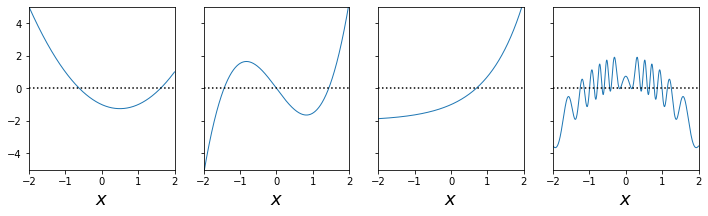

In [12]:
# exemplifying equations with 1, 2 or multiple roots
x = np.linspace(-2, 2, 1000)
f1 = x** 2 - x - 1
f2 = x ** 3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50/(1+x**2))

# plotting
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1)
    axes[n].axhline(0, ls=":", color="k")
    axes[n].set_ylim(-5, 5)
    axes[n].set_xlim(-2, 2)
    axes[n].set_xticks(list(range(-2, 3, 1)))
    axes[n].set_xlabel(r"$x$", fontsize=18)

Continue on page 202